In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
column_names = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
df = pd.read_csv("~/Documents/pyt/LabsML/data_banknote_authentication.txt", sep=',', names=column_names, header=None)
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [3]:
def sigmoid(z):
        return 1 / (1 + np.exp(-z))

In [4]:
class LossFunction:
    @staticmethod
    def logistic_loss(y_pred, y_true, X):
        #y_pred = 1 / (1 + np.exp(-y_pred))
        loss = np.log(1 + np.exp(-y_true * y_pred)).mean()
        d_loss = -y_true * np.exp(-y_true * y_pred) / (1 + np.exp(-y_true * y_pred))
        grad_w = (X.T @ d_loss) / X.shape[0]
        grad_b = d_loss.mean()
        return loss, grad_w, grad_b
        
    @staticmethod
    def ada_boost_loss(y_pred, y_true, X):
        #y_pred = 1 / (1 + np.exp(-y_pred))
        loss = np.exp(-y_true * y_pred).mean()
        d_loss = -y_true * np.exp(-y_true * y_pred)
        grad_w = (X.T @ d_loss) / X.shape[0] 
        grad_b = d_loss.mean()
        return loss, grad_w, grad_b

    @staticmethod
    def cross_entropy(y_pred, y_true, X):
        eps = 1e-3
        y_pred = 1 / (1 + np.exp(-y_pred))
        y_pred = np.clip(y_pred, eps, 1 - eps)
        loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        n = X.shape[0]
        grad_w = np.dot(X.T, (y_pred - y_true)) / n
        grad_b = np.sum(y_pred - y_true) / n
        return loss, grad_w, grad_b


In [5]:
class LogisticRegression:
    def __init__(self, loss_function = LossFunction.logistic_loss, learning_rate = 0.002, epochs = 3000):
        self.loss_function = loss_function
        self.weights = None
        self.bias = 0
        self.test_array = []
        self.train_array = []
        self.learning_rate = learning_rate
        self.epochs = epochs
         
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y, X_test, y_test):
        self.weights = np.zeros(X.shape[1])
        for _ in range(self.epochs):
            z = np.dot(X, self.weights) + self.bias
            loss, dw, db = self.loss_function(z, y, X)
            self.train_array.append(loss)
            z_test = np.dot(X_test, self.weights) + self.bias
            loss_test, _, _ = self.loss_function(z_test, y_test, X_test)
            self.test_array.append(loss_test)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def plot_loss(self):
        train_array = np.array(self.train_array)
        test_array = np.array(self.test_array)
        x = np.arange(0, self.epochs)
        plt.plot(x, train_array, color='b')
        plt.plot(x, test_array, color='r')
        plt.show()
        
            
        
    def predict_proba(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)
        
    def predict(self, X):
        prob = self.predict_proba(X)
        y_pred = np.array([1 if i > 0.5 else 0 for i in prob])
        return y_pred

In [6]:
X = df.drop(columns=['class'])
y = df['class']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

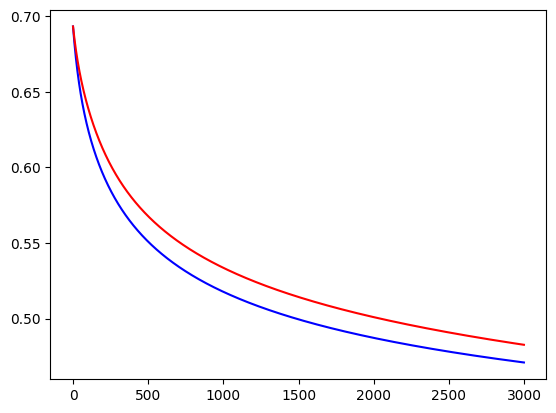

In [8]:
model_logloss = LogisticRegression(loss_function = LossFunction.logistic_loss)
model_logloss.fit(X_train, y_train, X_test, y_test)
model_logloss.plot_loss()

In [9]:
y_pred = model_logloss.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.730909090909091

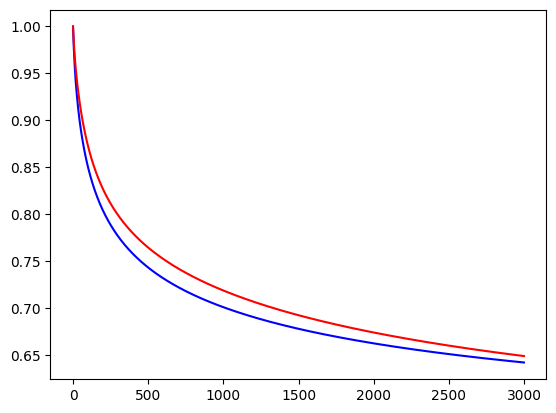

In [10]:
model_ada = LogisticRegression(loss_function = LossFunction.ada_boost_loss)
model_ada.fit(X_train, y_train, X_test, y_test)
model_ada.plot_loss()

In [11]:
y_pred = model_ada.predict(X_test)
accuracy_score(y_pred, y_test)

0.7527272727272727

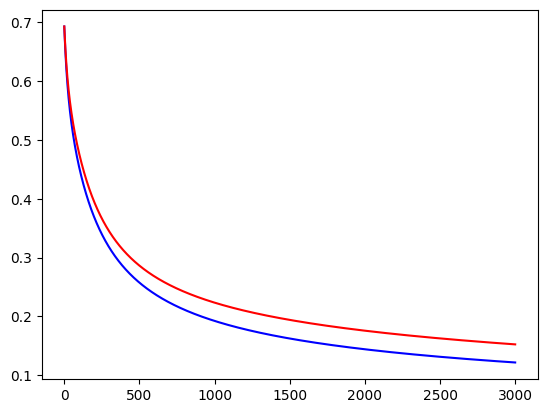

In [12]:
model_bce = LogisticRegression(loss_function = LossFunction.cross_entropy)
model_bce.fit(X_train, y_train, X_test, y_test)
model_bce.plot_loss()

In [13]:
y_pred = model_bce.predict(X_test)
accuracy_score(y_pred, y_test)

0.9490909090909091